# Medimos el WVP de films de almidón y almidón + nanopartículas de TiO2

WVP se mide pesando todos los días las celdas que contienen cloruro de calcio y el film en un ambiente de humedad controlada. La pendiente de la ganancia en masa de la celda en función de los días (G), por el espesor (e), dividido el área (A) y la diferencia de presión ($\Delta P$) (ya tabulado: 2238.56) es WVP:

$WVP=\frac{G e}{A\Delta P}$

### Medimos el espesor de las muestras
Las muestras son 8, 4 de almidón y 4 de almidón + TiO2, donde dos de cada una provienen del mismo film.
Las primeras 4 son de almidón y las siguientes 4 de almidón + TiO2. Van de a dos las que son del mismo film, en orden; a excepción del último que el número 5 no alcanzó para otro, por lo tanto quedaron 6-7-8 del mismo film.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
e=np.array([[0.31,0.288,0.325,0.301],
            [0.307,0.313,0.332,0.293],
            [0.356,0.412,0.400,0.362,0.391],
            [0.387,0.380,0.438,0.427,0.401],
            [0.280,0.250,0.252,0.262],
            [0.271,0.233,0.244,0.264,0.244],
            [0.278,0.307,0.279,0.237,0.290],
            [0.406,0.387,0.424,0.344,0.403],
            [0.244,0.268,0.281,0.261,0.266],
            [0.307,0.278,0.293,0.359,0.275],
            [0.193,0.168,0.219,0.276,0.217],
            [0.323,0.330,0.350,0.323,0.325]])

espesor=[]
for i in range(12):
    espesor.append(np.mean(e[i])*0.001)

espesor_error=[]
for i in range(12):
    espesor_error.append(np.std(e[i]))

<ipython-input-2-bfd421704222>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  e=np.array([[0.31,0.288,0.325,0.301],


In [3]:
print(espesor)

[0.000306, 0.00031125, 0.00038420000000000007, 0.00040660000000000007, 0.000261, 0.0002512, 0.0002782, 0.0003928, 0.000264, 0.00030240000000000003, 0.00021459999999999998, 0.0003302]


#### Pesamos todos los días las 8 celdas:

In [4]:
data= pd.read_csv('data_WVP_pares.csv',sep=',')


'''peso=np.array([[176.4953],
               [177.4160],
               [171.8288],
               [180.6072],
               [174.5893],
               [168.1466],
               [169.7353],
               [172.3274]])'''

'peso=np.array([[176.4953],\n               [177.4160],\n               [171.8288],\n               [180.6072],\n               [174.5893],\n               [168.1466],\n               [169.7353],\n               [172.3274]])'

In [5]:
peso=[]
for i in range(4):
    peso.append(np.array(data[f"{2*i+2}"]))

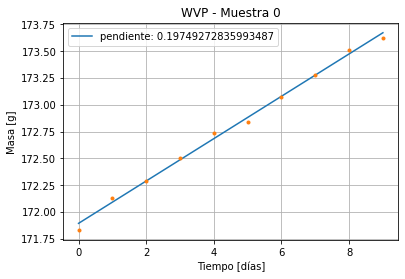

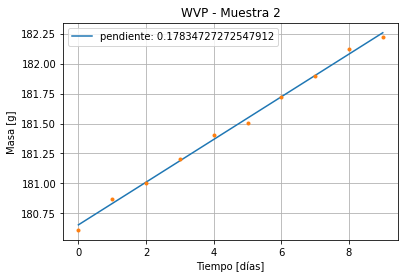

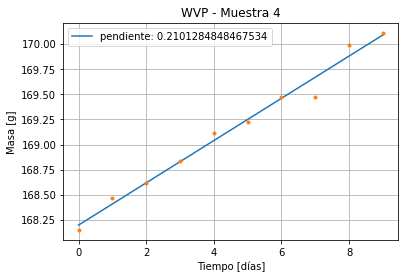

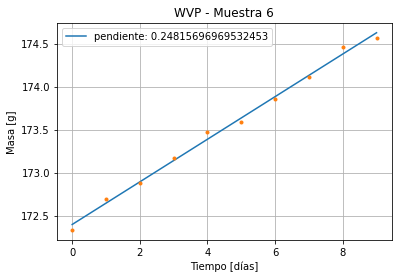

In [6]:
#Graficos
def lineal(x,a,b):
    return a*x+b

pendiente=[]
for i in range(4):
    x=np.arange(0,len(peso[i]),1)
    y=peso[i]
    popt,pcov=curve_fit(lineal,x,y)
    
    pendiente.append(popt[0])
    
    plt.plot(lineal(x,popt[0],popt[1]),label=f'pendiente: {popt[0]}')
    plt.title(f'WVP - Muestra {2*i}')
    plt.xlabel('Tiempo [días]')
    plt.ylabel('Masa [g]')
    plt.plot(x,y,'.')
    plt.legend()
    plt.plot()
    plt.grid(True)
    plt.show()

In [7]:
WVP=[]

for i in range(4):
    WVP.append(pendiente[i]*espesor[2*i+1]/2238.56)

In [8]:
pendiente

[0.19749272835993487,
 0.17834727272547912,
 0.2101284848467534,
 0.24815696969532453]

In [9]:
WVP

[2.7459443437758975e-08,
 3.239403951208805e-08,
 2.3579566950854322e-08,
 4.35440898150255e-08]

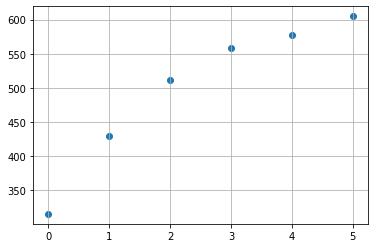

In [19]:
y=np.array([315,429,511,559,578,605])
x=np.array([0,1,2,3,4,5])

plt.scatter(x,y)
plt.grid(True)
plt.show()

In [20]:
popt,pcov=curve_fit(lineal,x,y)

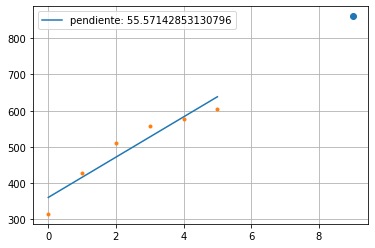

In [26]:
plt.plot(lineal(x,popt[0],popt[1]),label=f'pendiente: {popt[0]}')
plt.scatter(9,popt[0]*9+popt[1])
plt.plot(x,y,'.')
plt.legend()
plt.plot()
plt.grid(True)
plt.show()

In [27]:
popt[0]*9+popt[1]

805.1428570284934

In [ ]:
asignacion=np.array([7500,7725,8420,9262])
IP=np.array([120.5,126.5,138.2,167])


In [28]:
0.99865-0.5

0.49865000000000004